# Introduction:

**This analysis draws insights from a comprehensive dataset consisting of job postings   extracted from Google's search results for Data Analyst positions in the United States. The dataset, collected daily starting from November 4th, 2022, encompasses a substantial 38,924 records(till now). Its robust size ensures reliability in extracting meaningful insights to guide job seekers aspiring for roles in data analysis.✌✌✌**
***
### Key Findings:

📢**1.Job Openings Overview:**

*     The dataset spans the period from November 2022 to December 2023.
*     The average monthly count of job openings fluctuates around **2795.8**, remaining stable over the 14-month period.
*     Peaks in job demand occurred in January 2023 (3682 openings), while the lowest count was observed in December 2023 (2346).

📢**2.Salary Trends:**

*     Unfortunately, the median salary for Data Analyst positions shows a notable **decreasing** trend over the analyzed period.
*     This trend may raise concerns for individuals contemplating entry into the field.

📢**3.Top Platforms for Job Openings:**

*     LinkedIn leads in releasing the most Data Analyst job openings, followed by Upwork and BeBee.
*     Job seekers are advised to focus their search on these platforms for better opportunities.

📢**4.Job Types and Work Arrangements:**

*     Approximately 68.9% of jobs are full-time, with the remaining distributed mainly between contractor and part-time positions.
*     More than half (50.3%) of the job openings offer remote work options.

📢**5.Educational and Experience Requirements:**

*     A Bachelor's degree is generally sufficient for most Data Analyst roles.
*     A Master’s degree correlates with higher salaries, and work experience is highly valued by employers.

📢**6.Desirable Skills:**

*     Key skills include **SQL**, Excel, Python, Tableau, Power BI, and R.
*     Interpersonal and reporting skills are crucial.
*     The top 10 skills highlight proficiency in data analysis tools, visualization, reporting, and cloud computing.

📢**7.Salary Insights:**

*     The median salary for a Data Analyst is $\$$ 87,940, with a mean salary of $\$$ 93,300.4.
*     Salaries for full-time positions have higher expectations than part-time roles.
*     Contractor job salaries exhibit a bimodal distribution, with both high and low salary zones.

📢**8.Data Redundancy:**

*     A crucial issue addressed in this analysis is data redundancy caused by multiple postings of the same job by a company on different platforms.
*     Careful consideration is needed to ensure accurate monthly trends and salary expectations.
*     Different approaches should be applied when handling duplicated data points based on the analytical context.


### Conclusion:

**This report serves as a valuable guide for job seekers in the data analysis field, offering insights into job trends, salary expectations, and key skills demanded by employers. Attention to data redundancy is crucial for accurate analysis and interpretation of the dataset.**

**Note:**
Find the dataset on Kaggle: [Data Analyst Job Postings on Google Search](https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search).

# Analysis:
***
The key to reliable data analysis is understanding the data thoroughly. Several questions should be asked before conducting data analysis, in addition to checking the basic information of a dataset,such as:

To what extent can we trust this dataset? Why?
What flaws does this dataset have, and how can we address them to avoid misleading results?
What new features could be generated to better utilize this dataset and extract more meaningful information?

With these questions in mind,
### 👨👩🧑👧👦🧒LET'S DO IT!

### Step 1: Loading libraries and dataset

In [1]:
#  Library Support

import os
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data

job_df = pd.read_csv('/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv',index_col = 0)
job_df.head(5)

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'sql', 'aws']"
1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'azure', 'excel']"
3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"


In [3]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38924 entries, 0 to 38923
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                38924 non-null  int64  
 1   title                38924 non-null  object 
 2   company_name         38924 non-null  object 
 3   location             38897 non-null  object 
 4   via                  38915 non-null  object 
 5   description          38924 non-null  object 
 6   extensions           38924 non-null  object 
 7   job_id               38924 non-null  object 
 8   thumbnail            22615 non-null  object 
 9   posted_at            38924 non-null  object 
 10  schedule_type        38747 non-null  object 
 11  work_from_home       17364 non-null  object 
 12  salary               6648 non-null   object 
 13  search_term          38924 non-null  object 
 14  date_time            38924 non-null  object 
 15  search_location      38924 non-null  obje

In [4]:
# drop those irrelavant  columns:
job_df.drop(['index','location','extensions','job_id','thumbnail','posted_at','salary','search_term','search_location','commute_time'],axis =1,inplace = True)

# rename all the columns:
job_df.columns = ['Job_Title', 'Company_Name', 'Platform', 'Description', 'Schedule_Type',
       'Work_From_Home', 'Date_Time', 'Salary_Range', 'Salary_Rate',
       'Salary_Avg', 'Salary_Min', 'Salary_Max', 'Salary_Hourly',
       'Salary_Yearly', 'Salary_Standardized', 'Skills']
job_df.columns

Index(['Job_Title', 'Company_Name', 'Platform', 'Description', 'Schedule_Type',
       'Work_From_Home', 'Date_Time', 'Salary_Range', 'Salary_Rate',
       'Salary_Avg', 'Salary_Min', 'Salary_Max', 'Salary_Hourly',
       'Salary_Yearly', 'Salary_Standardized', 'Skills'],
      dtype='object')

In [5]:
print('There are {} unique job titles among all the {} job openings'.format(job_df.Job_Title.nunique(),job_df.shape[0]))
print('These {} job openings are released by {} different companies(average job counts : {})'.format(job_df.shape[0],job_df.Company_Name.nunique(),round(job_df.shape[0]/job_df.Company_Name.nunique(),2)))
print('These {} job openings are collected from {} different recruiting platforms'.format(job_df.shape[0],job_df.Platform.nunique()))

There are 14684 unique job titles among all the 38924 job openings
These 38924 job openings are released by 9205 different companies(average job counts : 4.23)
These 38924 job openings are collected from 592 different recruiting platforms




📢📢📢**Identify the data redundancy problem:** Is this information Truely accurate? Let's **EXAMINE AN EXAMPLE**:



In [6]:
job_df.loc[(job_df.Company_Name == 'Citi') & (job_df.Job_Title == 'Institutional Credit Management - Lending Data Analyst - Vice...')]

,Job_Title,Company_Name,Platform,Description,Schedule_Type,Work_From_Home,Date_Time,Salary_Range,Salary_Rate,Salary_Avg,Salary_Min,Salary_Max,Salary_Hourly,Salary_Yearly,Salary_Standardized,Skills
20310,Institutional Credit Management - Lending Data...,Citi,via WJTV Jobs,The Institutional Credit Management (ICM) grou...,Full-time,NaN,2023-02-09 04:00:21.954614,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['tableau', 'cognos']"
21273,Institutional Credit Management - Lending Data...,Citi,via WJHL Jobs,The Institutional Credit Management (ICM) grou...,Full-time,NaN,2023-01-10 04:00:18.330374,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['tableau', 'cognos']"
21675,Institutional Credit Management - Lending Data...,Citi,via WJTV Jobs,The Institutional Credit Management (ICM) grou...,Full-time,NaN,2023-01-17 04:00:15.976159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'cognos']"
38613,Institutional Credit Management - Lending Data...,Citi,via Big Country Jobs,The Institutional Credit Management (ICM) grou...,Full-time,NaN,2022-12-30 04:00:20.442535,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['tableau', 'cognos']"
38678,Institutional Credit Management - Lending Data...,Citi,via My ArkLaMiss Jobs,The Institutional Credit Management (ICM) grou...,Full-time,NaN,2023-01-31 04:00:56.985415,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['tableau', 'cognos']"
38923,Institutional Credit Management - Lending Data...,Citi,via My ArkLaMiss Jobs,The Institutional Credit Management (ICM) grou...,Full-time,NaN,2023-01-25 04:00:26.521124,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['tableau', 'cognos']"


In [7]:
print('Duplicated job openings:',job_df.duplicated(subset= ['Job_Title', 'Company_Name','Description']).sum())

Duplicated job openings: 11016




📢📢📢 We can see that Citi posted this job opening information on THREE different platforms at different times. Different approaches should be applied when handling duplicate data points based on the analytical context.

### Step 2: Check basic trends

* Since data for only one day in 2024 has been released, the trend plot excludes January 2024.
* Considering that the data for November 2022 was collected starting from the 4th, the monthly job counts for November 2022 were adjusted by multiplying them by the ratio 30/27
* When examining monthly trends, such as job counts and median salary, for a specific job opening available from January to March, it should be counted just once in each of these months.

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

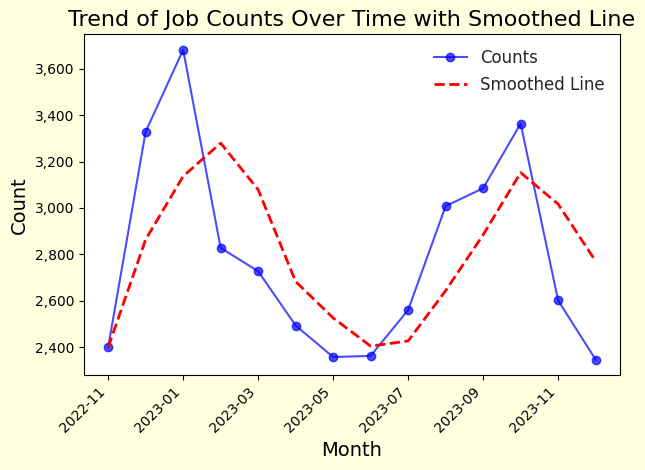

In [8]:
# Convert 'Data_time' to datetime type
job_df['Date_Time'] = pd.to_datetime(job_df['Date_Time'])

# Extract year, month, and day from 'Data_time'
job_df['Date'] = job_df['Date_Time'].dt.strftime('%Y-%m')
job_df_whole_month = job_df.loc[job_df.Date<='2023-12']

# Deal with redundancy
job_df = job_df.drop_duplicates(subset=['Job_Title', 'Company_Name', 'Description','Date'])

# Group by 'Date' and count the occurrences
count_trend = job_df_whole_month.groupby('Date').size()
count_trend['2022-11'] =  count_trend['2022-11']/27*30

# Set the background color of the entire chart
plt.figure().patch.set_facecolor('lightyellow')


# Smooth the line using a rolling window
smoothed_line = count_trend.rolling(window=3, min_periods=1).mean()

# Plot the trend with enhanced styling
plt.figure(figsize=(12, 6))
# Set the background color of the entire chart
plt.figure().patch.set_facecolor('lightyellow')

# Plot the actual counts
count_trend.plot(marker='o', linestyle='-', color='b', label='Counts', alpha=0.7)

# Plot the smoothed line
smoothed_line.plot(linestyle='--', linewidth=2, color='r', label='Smoothed Line')

# Style the plot background
plt.style.use('seaborn-darkgrid')

# Set labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Trend of Job Counts Over Time with Smoothed Line', fontsize=16)

# Add legend with a shadow
plt.legend(fontsize=12, shadow=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format the y-axis ticks with commas for better readability
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))

# Display the plot
plt.tight_layout()
plt.show()

📢📢📢Here are some Statistics about job counts:

In [9]:
# Display statistics about the Series
statistics = count_trend.describe()

# Extract mean, max, and min values along with their corresponding months
mean_value = statistics['mean']
max_value = statistics['max']
min_value = statistics['min']
mean_month = count_trend.idxmax()  # Month corresponding to the max value
max_month = count_trend.idxmax()  # Month corresponding to the min value
min_month = count_trend.idxmin()  # Month corresponding to the min value

# Display the statistics
print("Mean monthly job counts:", round(mean_value,1))
print("Max:", max_value, " (Month:", max_month, ")")
print("Min:", min_value, " (Month:", min_month, ")")

Mean monthly job counts: 2795.8
Max: 3682.0  (Month: 2023-01 )
Min: 2346.0  (Month: 2023-12 )


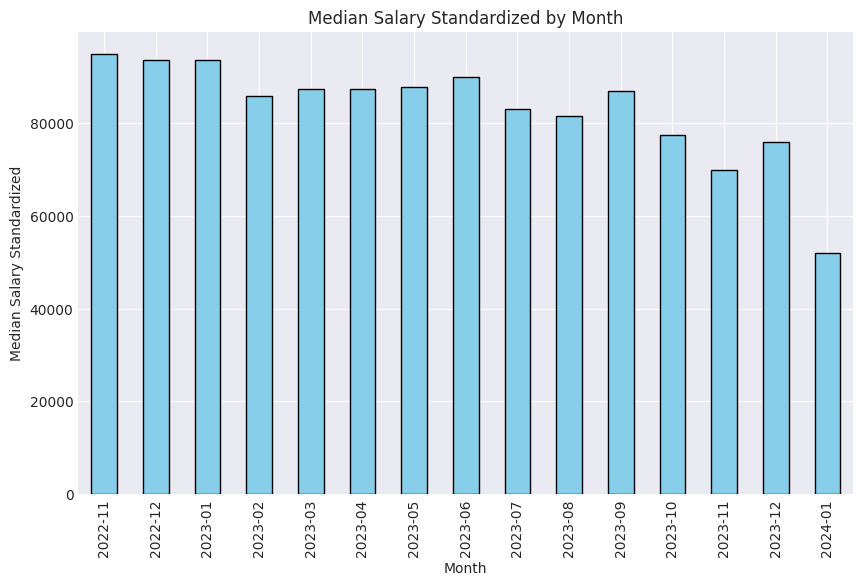

In [10]:
# Group by 'Date' and calculate the median Salary_Standardized
median_salary_by_date = job_df.groupby('Date')['Salary_Standardized'].median()

# Plot the bar chart
plt.figure(figsize=(10, 6))
median_salary_by_date.plot(kind='bar', color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Median Salary Standardized')
plt.title('Median Salary Standardized by Month')

# Display the plot
plt.show()

### Step 3: Statistics about Platforms, Job Types, Work Arrangements, Job requirements and Skills.

In [11]:
# remove those duplicated job information
job_df = job_df.sort_values(by='Date_Time', ascending=False)
job_df = job_df.drop_duplicates(subset=['Job_Title', 'Company_Name', 'Description'])

print('Unique job openings:',job_df.shape[0])

Unique job openings: 27908


In [12]:
# A function to do bar plot
def SkillBarPlot(counts1,totalNum):
    
    percentages = (counts1 / totalNum) * 100

    # Plot a beautiful horizontal bar chart
    plt.figure(figsize=(10, 6))
    ax = counts1.plot(kind='barh', color='skyblue', edgecolor='black')

    # Display the percentages on the bars
    for i, v in enumerate(counts1):
        plt.text(v + 200, i, f'{percentages[i]:.1f}%', color='black', va='center', fontsize=10)

    # Add a horizontal line at y=20000
    plt.axvline(x=totalNum, color='red', linestyle='--', linewidth=2, label='Totol Job Numbers')

    # Set labels and title
    plt.xlabel('Counts')
    plt.ylabel('Skills')
    plt.title('Top 10 Skills Counts')
    plt.legend()

    # Invert the y-axis for better visualization
    plt.gca().invert_yaxis()

    # Display the plot
    plt.tight_layout()
    plt.show()

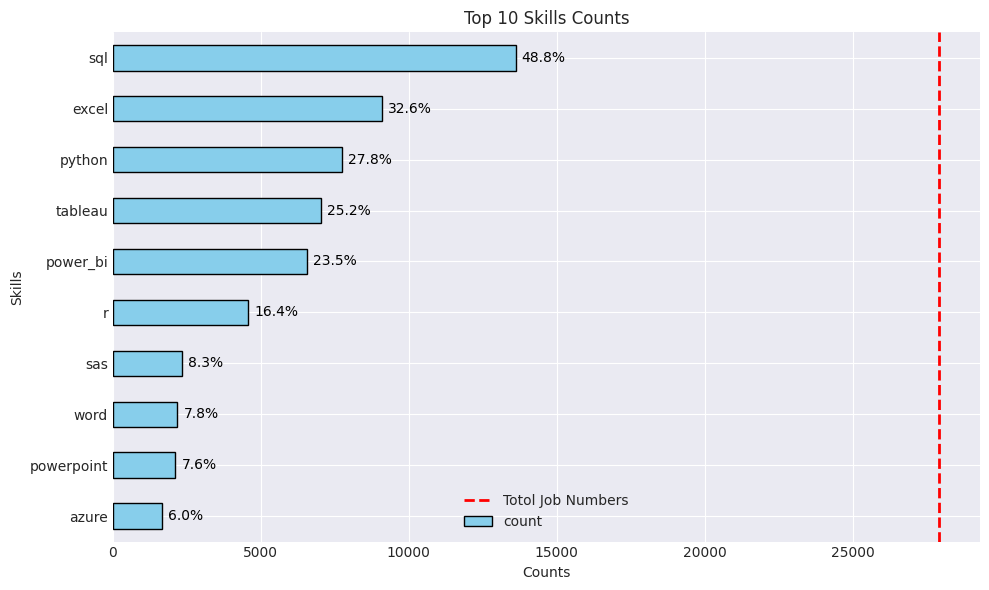

In [13]:
# preProcessing of the Column Skills
import ast
job_df.Skills = job_df.Skills.apply(lambda x: list(set(ast.literal_eval(x))))
# plot the skills needed
counts = pd.Series(job_df.Skills.explode()).value_counts()
counts1 = counts[:10]
SkillBarPlot(counts1,job_df.shape[0])

📢📢📢From the statistics, it is quite clear that **SQL** is definitely the most desirable skill for a data analyst, followed by Excel, Python, Tableau, Power BI, and R.

In [14]:
top_n = 5
Title_Counts = job_df.Job_Title.value_counts().sort_values(ascending = False)
Top_Titles = Title_Counts.nlargest(5)
other_counts = Title_Counts.iloc[top_n:].sum()
New_Titles = pd.concat([Top_Titles,pd.Series({'other':other_counts})])
Title_Counts = pd.DataFrame({'Counts':New_Titles.values,'Percent':New_Titles/sum(New_Titles)*100},index = New_Titles.index)
Title_Counts['Percent'] = Title_Counts['Percent'].map('{:.2f}%'.format)


Company_Counts = job_df.Company_Name.value_counts().sort_values(ascending = False)
Top_Companys = Company_Counts.nlargest(5)
other_counts = Company_Counts.iloc[top_n:].sum()
New_Companys = pd.concat([Top_Companys,pd.Series({'other':other_counts})])
Company_Counts = pd.DataFrame({'Counts':New_Companys.values,'Percent':New_Companys/sum(New_Companys)*100},index = New_Companys.index)
Company_Counts['Percent'] = Company_Counts['Percent'].map('{:.2f}%'.format)


Platform_Counts = job_df.Platform.value_counts().sort_values(ascending = False)
Top_Platforms = Platform_Counts.nlargest(5)
other_counts = Platform_Counts.iloc[top_n:].sum()
New_Platforms = pd.concat([Top_Platforms,pd.Series({'other':other_counts})])
Platform_Counts = pd.DataFrame({'Counts':New_Platforms.values,'Percent':New_Platforms/sum(New_Platforms)*100},index = New_Platforms.index)
Platform_Counts['Percent'] = Platform_Counts['Percent'].map('{:.2f}%'.format)

Type_Counts = job_df.Schedule_Type.value_counts().sort_values(ascending = False)
Top_Types = Type_Counts.nlargest(5)
other_counts = Type_Counts.iloc[top_n:].sum()
New_Types = pd.concat([Top_Types,pd.Series({'other':other_counts})])
Type_Counts = pd.DataFrame({'Counts':New_Types.values,'Percent':New_Types/sum(New_Types)*100},index = New_Types.index)
Type_Counts['Percent'] = Type_Counts['Percent'].map('{:.2f}%'.format)


display(Title_Counts.style.background_gradient(cmap='viridis'),
        Company_Counts.style.background_gradient(cmap='viridis'),
        Platform_Counts.style.background_gradient(cmap='viridis'),
        Type_Counts.style.background_gradient(cmap='viridis') 
       )

,Counts,Percent
Data Analyst,3355,12.02%
Senior Data Analyst,947,3.39%
Data Scientist,389,1.39%
Business Data Analyst,283,1.01%
Data Analyst II,210,0.75%
other,22724,81.42%


,Counts,Percent
Upwork,5130,18.38%
Talentify.io,778,2.79%
Walmart,379,1.36%
Dice,362,1.30%
Insight Global,283,1.01%
other,20976,75.16%


,Counts,Percent
via LinkedIn,9866,35.35%
via Upwork,5123,18.36%
via BeBee,3306,11.85%
via Trabajo.org,2310,8.28%
via Indeed,1387,4.97%
other,5916,21.20%


,Counts,Percent
Full-time,19148,68.91%
Contractor,6299,22.67%
Contractor and Temp work,1313,4.73%
Part-time,311,1.12%
Full-time and Part-time,174,0.63%
other,542,1.95%


📢📢📢Insights: From these results, we can see that LinkedIn and Upwork are the platforms where we can find most data analyst positions.

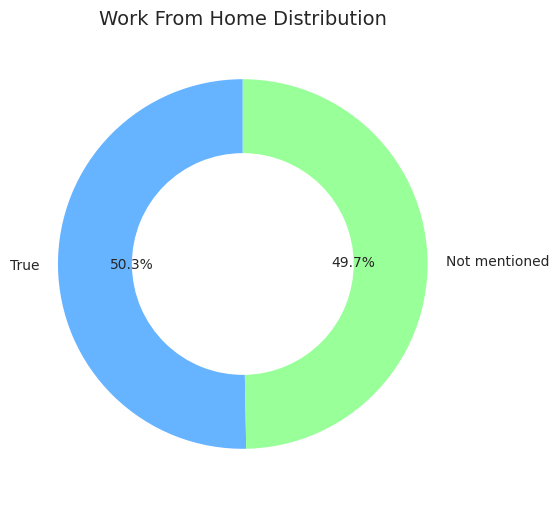

In [15]:
job_df['Work_From_Home'] = job_df['Work_From_Home'].fillna('Not mentioned')
# Create a smaller and more beautiful pie chart based on 'Work_From_Home' column
plt.figure(figsize=(6, 6))

# Define custom colors for the pie chart
colors = ['#66b3ff', '#99ff99']

# Create a pie chart
plt.pie(job_df['Work_From_Home'].value_counts(), labels=job_df['Work_From_Home'].value_counts().index,
        autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))

# Set a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0.8)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Work From Home Distribution', fontsize=14)

# Display the pie chart
plt.show()

📢📢📢Surprisingly, more than half of data analyst jobs allow workers to work from home.

In [16]:
job_df['Bachelor'] =  job_df['Description'].str.contains('bachelor', case=False) & job_df['Description'].str.contains('degree', case=False)
job_df['Master'] = (job_df['Description'].str.contains('master', case=False) & job_df['Description'].str.contains('degree', case=False))
job_df['Doctorate'] = (job_df['Description'].str.contains('doctorate', case=False) & job_df['Description'].str.contains('degree', case=False))
job_df['Experience'] = (job_df['Description'].str.contains('years', case=False) & job_df['Description'].str.contains('experience', case=False))
job_df['Communication'] = (job_df['Description'].str.contains('interpersonal', case=False) | job_df['Description'].str.contains('communicat', case=False))
job_df['Writing'] = (job_df['Description'].str.contains('writing', case=False) | job_df['Description'].str.contains('written', case=False))
job_df['Presentation'] = (job_df['Description'].str.contains('presentation', case=False))

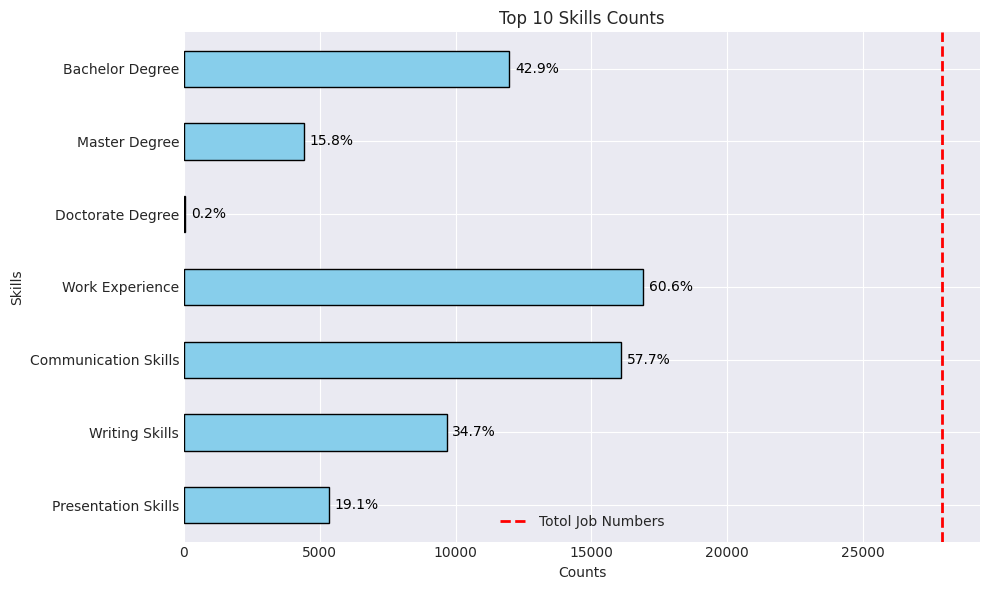

In [17]:
CountsOtherIndicators = pd.Series({'Bachelor Degree':job_df.Bachelor.sum(),
                         'Master Degree':job_df.Master.sum(),
                         'Doctorate Degree': job_df.Doctorate.sum(),
                         'Work Experience':job_df.Experience.sum(),
                         'Communication Skills':job_df.Communication.sum(),
                         'Writing Skills':job_df.Writing.sum(),
                         'Presentation Skills':job_df.Presentation.sum()            
                        })
SkillBarPlot(CountsOtherIndicators,job_df.shape[0])

📢📢📢We can see that a Bachelor's degree is sufficient for most data analyst jobs.

📢📢📢Most jobs prefer candidates with work experience.

📢📢📢Interpersonal skills and reporting skills are highly needed in these positions.

### Step 4: Let's talk about money!🧧🧧🧧


In [18]:
job_df.Salary_Standardized.describe()

count      4939.000000
mean      93231.845347
std       44731.123405
min       15080.000000
25%       62400.000000
50%       87500.000000
75%      119600.000000
max      624000.000000
Name: Salary_Standardized, dtype: float64

📢📢📢We can see that the median salary for a data analyst is $\$$ 87,940, and the mean value of the salaries is $\$$ 93,300.4.

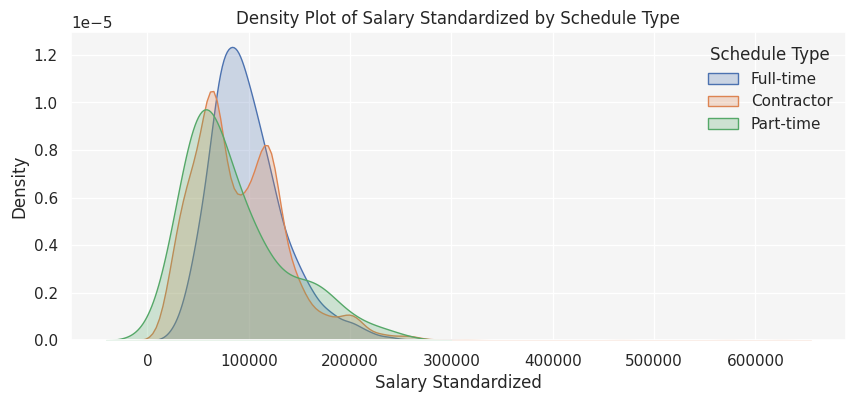

In [19]:
selected_df = job_df[job_df['Schedule_Type'].isin(['Full-time', 'Contractor', 'Part-time'])]


# Set the style of seaborn and background color
sns.set(style="whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10, 4))
sns.set(rc={'axes.facecolor': '#f5f5f5', 'figure.facecolor': '#f5f5f5'})

# Create three density plots based on Schedule_Type with labels
sns.kdeplot(data=selected_df[selected_df['Schedule_Type']=='Full-time'], x='Salary_Standardized', label='Full-time', fill=True, common_norm=False)
sns.kdeplot(data=selected_df[selected_df['Schedule_Type']=='Contractor'], x='Salary_Standardized', label='Contractor', fill=True, common_norm=False)
sns.kdeplot(data=selected_df[selected_df['Schedule_Type']=='Part-time'], x='Salary_Standardized', label='Part-time', fill=True, common_norm=False)

# Set labels and title
plt.xlabel('Salary Standardized')
plt.ylabel('Density')
plt.title('Density Plot of Salary Standardized by Schedule Type')

# Display a legend with a title and a shadow
plt.legend(title='Schedule Type', shadow=True)

# Display the plot
plt.show()

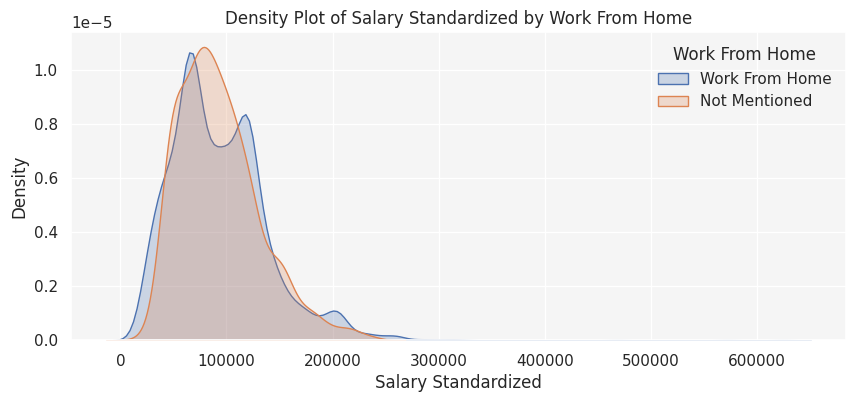

In [20]:
# Set the style of seaborn and background color
sns.set(style="whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,4))
sns.set(rc={'axes.facecolor': '#f5f5f5', 'figure.facecolor': '#f5f5f5'})

# Create two density plots based on Work_From_Home with labels
sns.kdeplot(data=job_df[job_df['Work_From_Home']==True], x='Salary_Standardized', label='Work From Home', fill=True, common_norm=False)
sns.kdeplot(data=job_df[job_df['Work_From_Home']=='Not mentioned'], x='Salary_Standardized', label='Not Mentioned', fill=True, common_norm=False)

# Set labels and title
plt.xlabel('Salary Standardized')
plt.ylabel('Density')
plt.title('Density Plot of Salary Standardized by Work From Home')

# Display a legend with a title and a shadow
plt.legend(title='Work From Home', shadow=True)

# Display the plot
plt.show()

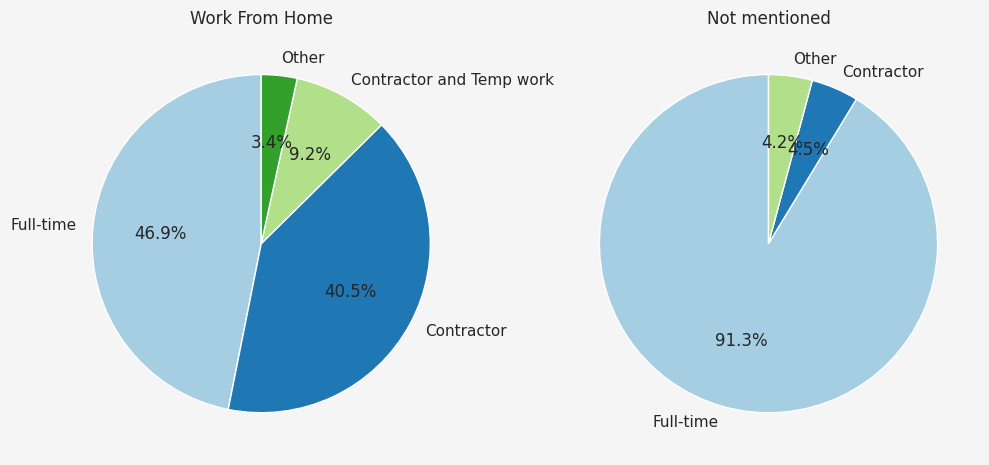

In [21]:
# Filter records where Work_From_Home is 'True' or 'Not mentioned'
filtered_df_true = job_df[job_df['Work_From_Home'] == True]
filtered_df_not_mentioned = job_df[job_df['Work_From_Home'] == 'Not mentioned']

# Calculate the percentage of different values in Schedule_Type
percentage_true = (filtered_df_true['Schedule_Type'].value_counts() / len(filtered_df_true)) * 100
percentage_not_mentioned = (filtered_df_not_mentioned['Schedule_Type'].value_counts() / len(filtered_df_not_mentioned)) * 100

# Combine categories with less than 5% into 'Other'
threshold = 3
percentage_true['Other'] = percentage_true[percentage_true < threshold].sum()
percentage_true = percentage_true[percentage_true >= threshold]

percentage_not_mentioned['Other'] = percentage_not_mentioned[percentage_not_mentioned < threshold].sum()
percentage_not_mentioned = percentage_not_mentioned[percentage_not_mentioned >= threshold]

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart for Work_From_Home == 'True'
axes[0].pie(percentage_true, labels=percentage_true.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title("Work From Home")

# Plot the second pie chart for Work_From_Home == 'Not mentioned'
axes[1].pie(percentage_not_mentioned, labels=percentage_not_mentioned.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title("Not mentioned")

# Display the subplots
plt.show()

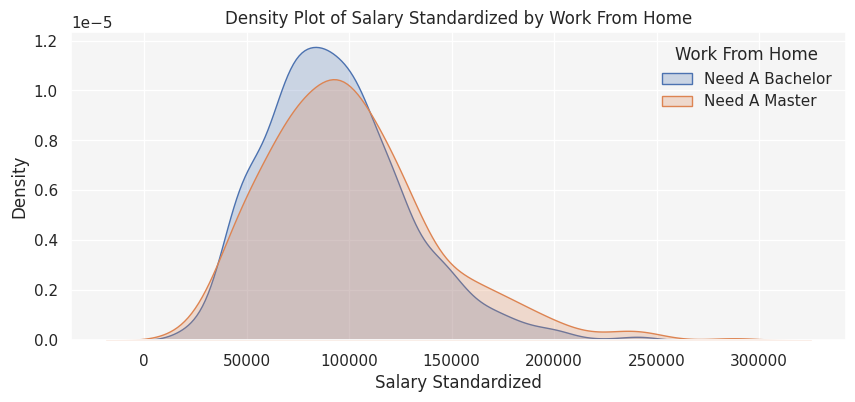

In [22]:
# Set the style of seaborn and background color
sns.set(style="whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10,4))
sns.set(rc={'axes.facecolor': '#f5f5f5', 'figure.facecolor': '#f5f5f5'})

# Create two density plots based on Work_From_Home with labels
sns.kdeplot(data=job_df[job_df['Bachelor']==True], x='Salary_Standardized', label='Need A Bachelor', fill=True, common_norm=False)
sns.kdeplot(data=job_df[job_df['Master']==True], x='Salary_Standardized', label='Need A Master', fill=True, common_norm=False)

# Set labels and title
plt.xlabel('Salary Standardized')
plt.ylabel('Density')
plt.title('Density Plot of Salary Standardized by Work From Home')

# Display a legend with a title and a shadow
plt.legend(title='Work From Home', shadow=True)

# Display the plot
plt.show()

In [23]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(job_df[job_df['Bachelor']==True]['Salary_Standardized'],
                                 job_df[job_df['Master']==True]['Salary_Standardized'],
                                 equal_var=False, nan_policy='omit')

# Display the t-test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the difference is statistically significant (using a common threshold of 0.05)
if p_value < 0.05:
    print("\nThe difference in salaries is statistically significant.")
else:
    print("\nThe difference in salaries is not statistically significant.")

T-Statistic: -3.012160160223139
P-Value: 0.002703152372483735

The difference in salaries is statistically significant.


We divide this dataset into two parts: high-salary jobs and low-salary jobs (divided by the median of Salary_Standardized) and check the skillsets for these two groups.

In [24]:
HighSalaryJobs = job_df.loc[job_df.Salary_Standardized>job_df.Salary_Standardized.median()]
LowSalaryJobs = job_df.loc[job_df.Salary_Standardized<job_df.Salary_Standardized.median()]

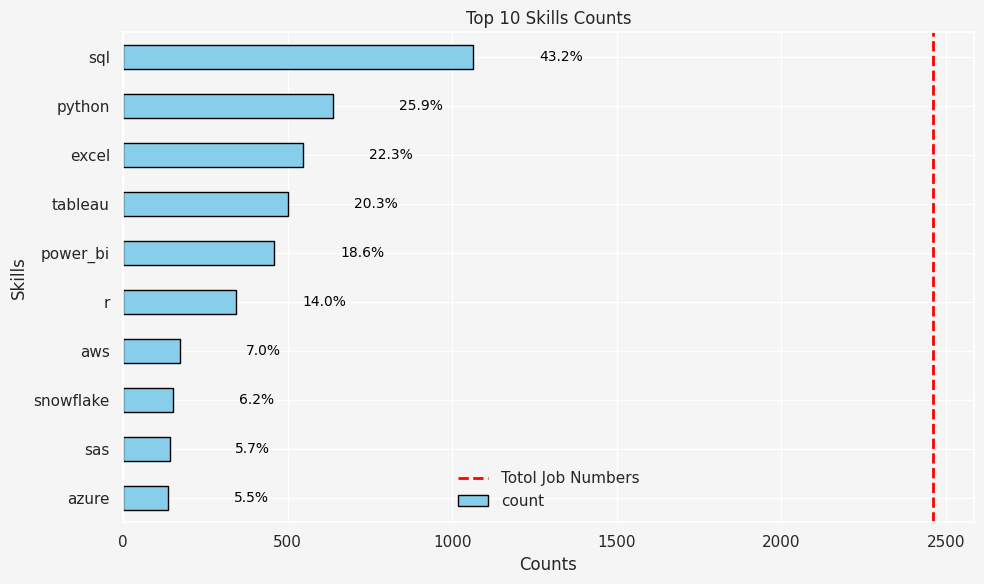

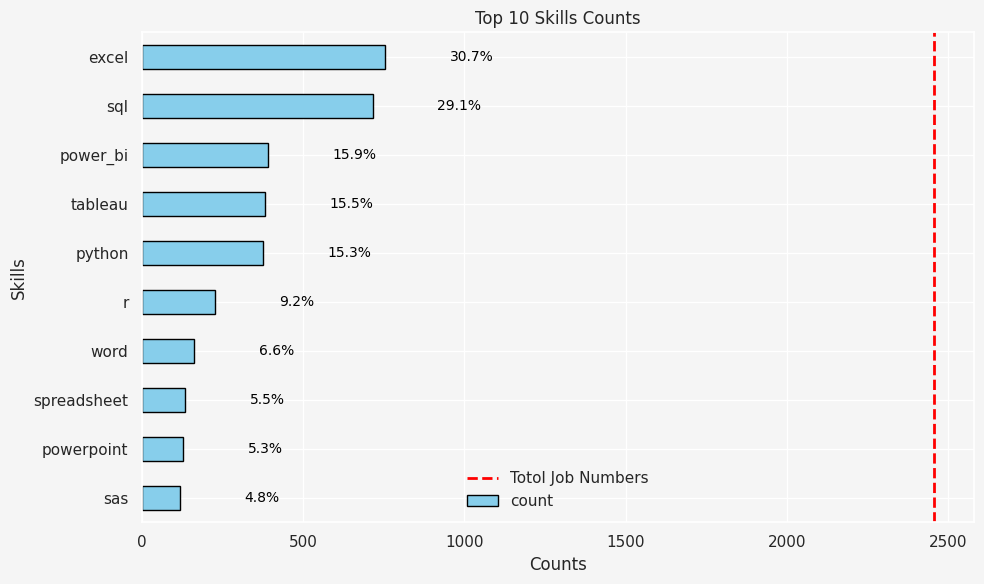

In [25]:
counts = pd.Series(HighSalaryJobs.Skills.explode()).value_counts()
counts1 = counts[:10]
SkillBarPlot(counts1,HighSalaryJobs.shape[0])
counts = pd.Series(LowSalaryJobs.Skills.explode()).value_counts()
counts1 = counts[:10]
SkillBarPlot(counts1,LowSalaryJobs.shape[0])

Let's check what skills are needed for a high-salary contractor job.

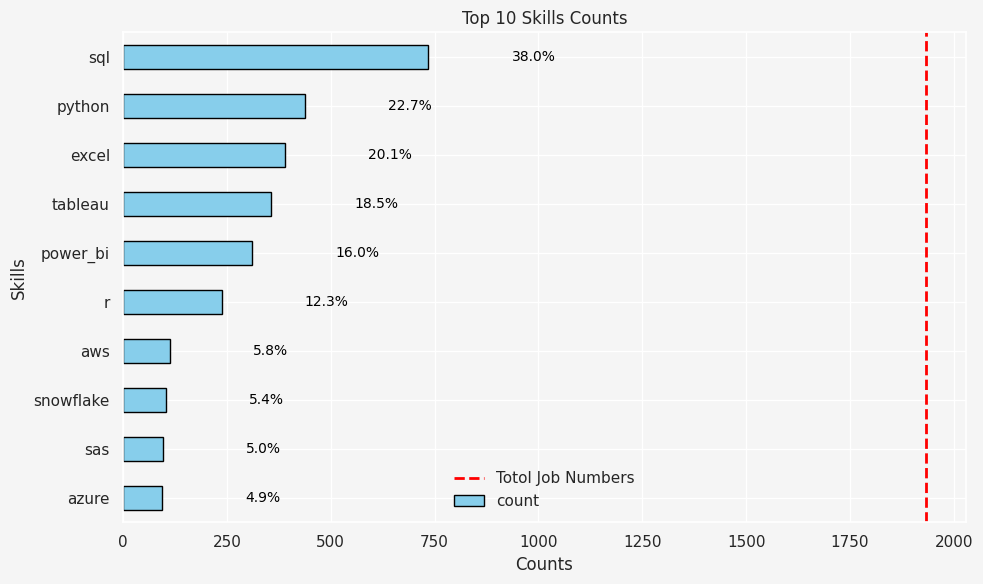

In [26]:
HighSalaryContractorJobs = job_df.loc[(job_df.Salary_Standardized>job_df.Salary_Standardized.median())&(job_df.Work_From_Home==True)]
counts = pd.Series(HighSalaryContractorJobs.Skills.explode()).value_counts()
counts1 = counts[:10]
SkillBarPlot(counts1,HighSalaryContractorJobs.shape[0])